# 数据集，数据加载器

处理数据样本的代码可能会变得混乱且难以维护；理想情况下，我们希望数据集代码与模型训练代码分离，以提高可读性和模块化。PyTorch 提供了两个数据基类：`torch.utils.data.DataLoader` 和 `torch.utils.data.Dataset`，允许您使用预加载的数据集以及您自己的数据。`Dataset` 存储样本及其对应的标签，`DataLoader` 将可迭代对象包装在 `Dataset` 周围，以便于访问样本

>PyTorch 领域库提供了一些预加载的数据集（例如 `FashionMNIST`），它们是 `torch.utils.data.Dataset` 的子类，并实现了特定于特定数据的函数

In [2]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.io import read_image
from torchvision.transforms import ToTensor
import pandas as pd
import matplotlib.pyplot as plt

## 加载数据集

以下是如何从 TorchVision 加载 Fashion-MNIST 数据集的示例。Fashion-MNIST 是一个包含 Zalando 文章图像的数据集，包含 60,000 个训练样本和 10,000 个测试样本。每个样本都包含一个 28×28 的灰度图像以及来自 10 个类别之一的关联标签

- `root` 是存储训练/测试数据集的路径
- `train` 指定训练或测试数据集
- `download=True` 如果 `root` 中没有数据则从互联网下载数据
- `transform` 和 `target_transform` 指定特征和标签转换

In [3]:
training_data = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=ToTensor()
)
training_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 数据集迭代和可视化

我们可以像列表一样手动索引 `Datasets`：`training_data[index]`。并使用 `matplotlib` 来可视化训练数据中的一些样本

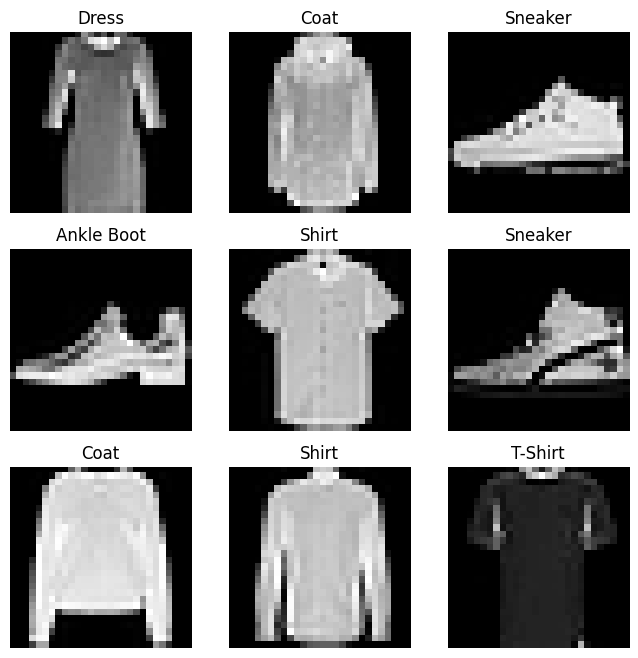

In [8]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 创建自定义数据集

自定义 `Dataset` 类必须实现三个函数：`__init__`、`__len__` 和 `__getitem__`。看一下这个实现；`FashionMNIST` 图像存储在目录 `img_dir` 中，它们的标签分别存储在 CSV 文件 `annotations_file` 中

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label